In [1]:
#Libraries to download - Pre requisites
%pip install tweepy
%pip install nltk
%pip install vaderSentiment
%pip install TextBlob
%pip install gensim
%pip install matplotlib
%pip install pandas
%pip install sklearn
%pip install normalise
%pip install pyLDAvis
%pip install requests
%pip install WordCloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to rest

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to rest

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries imported to use in Assignment:
import pandas as pd 
import json
from argparse import ArgumentParser
from nltk.corpus import stopwords
import numpy as np
import nltk
import tweepy as tp
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim.corpora as corpora
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string 
from nltk.tokenize import word_tokenize
import json
import time
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


#Downlaoding Stop Words / Wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gagan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/gagan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gagan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/gagan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gagan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
api_key="UJ4IDf8TDkwxl7ooMeZLOGxaY"
api_key_secret="EXG1e6MlQ7mGPv86cRBllGv38QeCC4B91pYqxnKmK4Xg777LCt"
access_token="258202282-7LQJcDTcGDL4rjVKviQLpHAgjXMqHYl6wQnSgDpN"
access_token_secret="F0YXJLpX0iELDZ692ExHvcARrvpJpXYfV6TYj3ssUVjRF"
auth = tp.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

In [4]:
#Function to clean tweets 

In [5]:
#Data Cleansing

porStem = PorterStemmer()


def getWordnetPosTag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tagDict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tagDict.get(tag, wordnet.NOUN)


def LemTweet(sentence):
    lemmatizer = WordNetLemmatizer()
    lemm = (" ".join([lemmatizer.lemmatize(w, getWordnetPosTag(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))
    return lemm
    
    
def removeStopWordsfromTweets(sentence):
    swr = (" ".join( w for w in nltk.word_tokenize(sentence) if w not in stopwords.words()))
    return swr

def stemTweet(sentence):
    st = (" ".join([porStem.stem(w) for w in nltk.word_tokenize(sentence)]))
    return st

#Data Clenasing
def cleanTweet(tweet):
    if type(tweet) != str:
        return ""
    tweet = tweet.lower()
    tweet = re.sub("'", "", tweet)
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)
    tweet = re.sub("[^a-z0-9]"," ", tweet)
    tweet = re.sub("telsa","tesla", tweet)
    tweet = tweet.strip()
    tweet = LemTweet(tweet)
#     tweet = stemTweet(tweet)
    tweet = removeStopWordsfromTweets(tweet)
    tweet = replaceAbbrinTweets(tweet)
    
    return tweet

def replaceaabr(word):
    abbr = {
        "fsd":"full self driving",
        "gpu": "Graphical processing unit",
        "cvpr": "Computer Vision and Pattern Recognition",
        "rn": "right now",
        "lol": "laughing out loud",
        "lidr": " Light Detection and Ranging",
        "imho" : "in my humble opinion",
        "ayfkmwts" : "are you fing kidding me with this s",
        "gtfooh" : "get the f out of here",
        "oh" : "overheard",
        "rlrt" : "real-life re-tweet, a close cousin to oh",
        "gmafb" : "give me a fing break",
        "nbd" : "no big deal",
        "smh" : "shaking my head",
        "idk" : "i don't know",
        "stfu" : "shut the f up",
        "nfw" : "no fing way",
        "irl" : "in real life",
        "nsfw" : "not safe for work",
        "sfw" : "safe for work",
        "fml" : "f my life",
        "fwiw" : "for what it's worth",
        "qotd" : "quote of the day",
        "lmao" : "laughing my ass off",
        "hotd" : "headline of the day",
        "ftw" : "for the win",
        "btw" : "by the way",
        "bfn" : "bye for now",
        "afaik" : "as far as i know",
        "lol" : "laugh out loud",
        "ty" : "thank you",
        "yw" : "you're welcome"
    }
    return abbr.get(word.lower()).lower()

def replaceAbbrinTweets(sentence):
    abbrList=['fsd','gpu','cvpr', 'rn', 'lol', 'lidr', 'imho', 'ayfkmwts', 'gtfooh', 'oh', 'rlrt', 'gmafb', 'nbd', 'smh', 'idk', 'stfu', 'nfw', 'irl', 'nsfw', 'sfw', 'fml', 'fwiw', 'qotd', 'lmao', 'hotd', 'ftw', 'btw', 'bfn', 'afaik', 'ty', 'yw']
    words = nltk.word_tokenize(sentence)
    newSentence= []
    for word in words:
        if word.lower() in abbrList:
            newSentence.append(replaceaabr(word)) 
        else:
            newSentence.append(word)
    rst= " ".join(newSentence)        
    return rst


#Data Transformation:

def getHashTag(row):
    rec = row['hashtags']
    rec = rec.replace("'", '"')
    newHSlist=[]
    hsList = json.loads(rec)
    if len(hsList) > 0:
        for hs in hsList:
            for key,value in hs.items():
                if key == 'text':
                    newHSlist.append(value)
    return " ".join(newHSlist)

def getTopSentiment(df,key,ascending=True):
#     ascending true give top negetive reviews and vice versa 
    sdf = df.sort_values(by=key,ascending=ascending).reset_index()
    return sdf

# Sentiment Analysis:
# NLTK TEXTBLOB Analysis
def nltktextBlobAnalysis(tweet):
    sp = TextBlob(str(tweet)).sentiment.polarity
    isNue= sp ==0
    isPos = sp >0.5
    if isPos:
        return "positive"
    elif isNue: 
        return "neutral"
    else:
        return"negative"

def nltktextBlobAnalysisScore(tweet):
    sp = TextBlob(str(tweet)).sentiment.polarity
    return sp
# NLTK VADER Analysis


analyzer = SentimentIntensityAnalyzer()
def nltkvaderAnalysis(tweet):
    cp = analyzer.polarity_scores(tweet)['compound']
    isNue= cp ==0
    isPos = cp >0.3
    if isPos:
        return "positive"
    elif isNue: 
        return "neutral"
    else:
        return"negative"

def nltkvaderAnalysisScore(tweet):
    cp = analyzer.polarity_scores(tweet)['compound']
    return cp


#Visualization

def getNgrams(df, ngramFrom=2, ngramTo=2, maxWords=None, maxFeatures=50000):
    
    vec = CountVectorizer(ngram_range = (ngramFrom, ngramTo), 
                          max_features = maxFeatures,stop_words='english').fit(df)
    bow = vec.transform(df)
    sumW = bow.sum(axis = 0) 
    wordsFreq = [(word, sumW[0, i]) for word, i in vec.vocabulary_.items()]
    wordsFreq = sorted(wordsFreq, key = lambda x: x[1], reverse = True)
    return wordsFreq[:maxWords]

def sentenceToWords(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def convertTexttoWordCloud(listofTweets):
    allTweets = ','.join(list(listofTweets.values))
    wordcloud = WordCloud(background_color="white", max_words=1000)
    wordcloud.generate(allTweets)
    return wordcloud.to_image()


#Util:
def waitOnRateLimit(cObject):
    while True:
        try:
            yield cObject.next()
        except tp.TooManyRequests:
            print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
            time.sleep(15 * 62)
        except:
            print("Run Stopped")
            break

def gethashTagcount(df):
    hsset=set()
    hscolumn = df['hashtagsonTweet']
    for da in hscolumn:
        splitda= da.split(" ")
        for tags in splitda:
            if da!="" or da!=None:
                hsset.add(tags)
    return len(hsset)           

# def transflateFrntoEng(row):
# <to do ><priority 3>if time permists write function to convert forieng language tweets to English

    

In [6]:
toFromCSV='TweetsMusk.csv'

In [49]:

keywords = 'from:elonmusk'
# keywords = keywords + ' -filter:retweets' # using filter to remove retweets

# api.search, q='to:{}'.format(user_name),
#                                 since_id=tweet_id, tweet_mode='extended'
limit=3000
# limit 50000
tweets = waitOnRateLimit(tp.Cursor(api.user_timeline,
                       screen_name='elonmusk',
#                        tweet_mode='extended',
#                        lang='en', # using filter to tweets not in english
                       ).items(limit))

columns = ['User', 'Tweet','created_at','hashtags','lang']
data = []
for tweet in tweets:
    data.append(['elonmusk',tweet.text,tweet.created_at,tweet.entities['hashtags'],tweet.lang])
df = pd.DataFrame(data, columns=columns)
df.to_csv(toFromCSV)

Run Stopped
Run Stopped


In [55]:
##Reading tweets from CSV
tweetdf


,Unnamed: 0,User,Tweet,created_at,hashtags,lang
0,0,elonmusk,"@MedvedevRussiaE @trussliz Btw, how’s it going...",2022-10-20 21:20:40+00:00,[],en
1,1,elonmusk,@MedvedevRussiaE @trussliz Pretty good troll tbh,2022-10-20 21:12:17+00:00,[],en
2,2,elonmusk,@Alan_McGuinness *humour,2022-10-20 21:07:30+00:00,[],fr
3,3,elonmusk,@ilyasut I couldn’t agree more 😜,2022-10-20 20:37:33+00:00,[],en
4,4,elonmusk,@Alan_McGuinness British humor is the best,2022-10-20 20:36:51+00:00,[],en
...,...,...,...,...,...,...
2995,2995,elonmusk,@TheRealKeean Double-standard?,2022-02-05 03:11:29+00:00,[],en
2996,2996,elonmusk,@TheRealKeean https://t.co/ok0BmaoapC,2022-02-05 03:10:54+00:00,[],qme
2997,2997,elonmusk,@TheRealKeean It’s not my money https://t.co/I...,2022-02-05 02:56:19+00:00,[],en
2998,2998,elonmusk,@Tesmanian_com A bigger win than it may seem,2022-02-04 18:50:43+00:00,[],en


In [99]:
tweetdf = pd.read_csv(toFromCSV, parse_dates=['created_at'])
tweetdf['Tweet'].size

3000

In [100]:
tweetdf['Tweet'].fillna("",inplace=True)
tweetdf = tweetdf[tweetdf['lang']=='en'] # this was written to handle languages , but later added a parameter in api call
print(tweetdf['Tweet'].size)
#removing  retweets 
tweetdf.drop(tweetdf[tweetdf['Tweet'].str.startswith("RT")].index, inplace=True) #removing retweets

2418


In [101]:
#Cleaning Tweets for performing Analysis

In [102]:
tweetdf['CleanedTweet'] = tweetdf.apply(lambda row: cleanTweet(row['Tweet']), axis =1)
tweetdf.reset_index(inplace=True)

In [103]:
tweetdf['CleanedTweet'] 

0                                          bakhmut
1                                 pretty troll tbh
2                                            agree
3                                    british humor
4       compromise overwhelmingly outcome question
                           ...                    
2294                high resolution radar relevant
2295     solve huge part make car drive retrospect
2296                               double standard
2297                                         money
2298                                       big win
Name: CleanedTweet, Length: 2299, dtype: object

In [12]:
# Cleaning HashTags and creating hasTag column

In [79]:
tweetdf['hashtagsonTweet'] = tweetdf.apply(lambda row: getHashTag(row), axis =1)

/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_92002/495759330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetdf['hashtagsonTweet'] = tweetdf.apply(lambda row: getHashTag(row), axis =1)


In [80]:
# Get number of unique hashtags

In [81]:
gethashTagcount(tweetdf)

1

In [82]:
#Language Based Analysis 
# an api parameter is used to filter languages while extracting tweets "lang='en'"

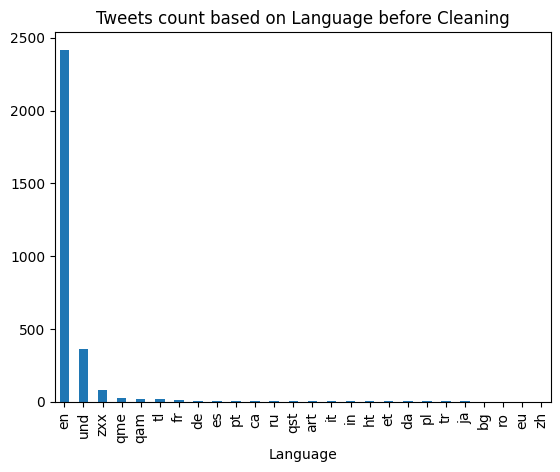

In [83]:
tweetdfCopy = pd.read_csv(toFromCSV)
tweetlanggp = tweetdfCopy.groupby('lang').count()
tweetlanggp.sort_values(by='Tweet',ascending=False,inplace= True)
tweetlanggp['Tweet'].plot(kind='bar')
plt.title('Tweets count based on Language before Cleaning')
plt.xlabel('Language')
plt.show()

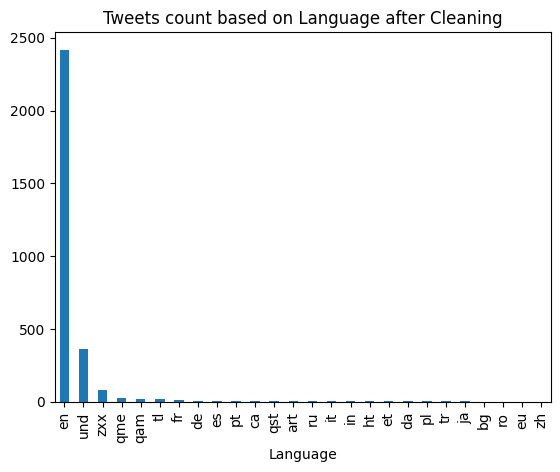

In [84]:
# tweetlanggp = tweetdf.groupby('lang').count()
tweetlanggp.sort_values(by='Tweet',ascending=False,inplace= True)
tweetdf.head()
tweetlanggp['Tweet'].plot(kind='bar')
plt.title('Tweets count based on Language after Cleaning')
plt.xlabel('Language')
plt.show()

In [23]:
#Unigram Extraction and Analysis

In [86]:
unigram=getNgrams(tweetdf['Tweet'], ngramFrom=1, ngramTo=1)
print(len(unigram))

5729


In [87]:
# Visualizing Unigrams:

            word  frequency
0          https        657
1            amp        180
2          tesla        159
3  wholemarsblog        144
4  teslaownerssv        127
5        twitter        124
6         spacex        118
7       ppathole        101
8       billym2k         93
9           good         81


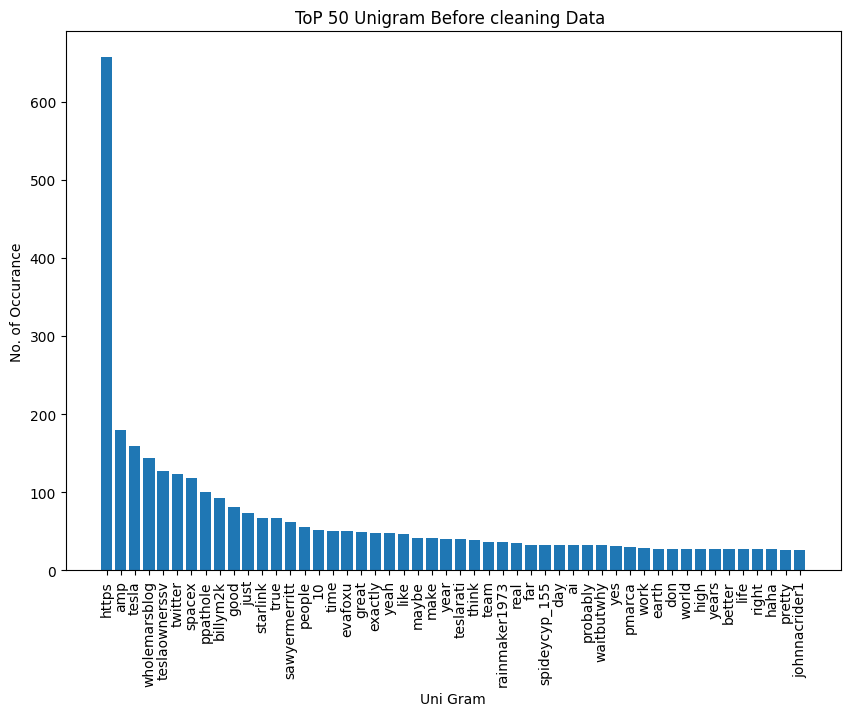

In [88]:
unigramDF= pd.DataFrame(unigram[0:50])
unigramDF.columns=["word","frequency"]
print(unigramDF.head(10))
fig = plt.figure(figsize =(10, 7))
plt.bar(unigramDF['word'], unigramDF["frequency"])
y_pos = range(len(unigramDF['word']))
plt.xticks(y_pos, unigramDF['word'], rotation=90)
plt.xlabel("Uni Gram")
plt.ylabel("No. of Occurance")
plt.title("ToP 50 Unigram Before cleaning Data ")
plt.show()

In [92]:
unigram=getNgrams(tweetdf['CleanedTweet'], ngramFrom=1, ngramTo=1)
print(len(unigram))

3380


In [93]:
# Visualizing unigram after cleaning:

Top Unigram
       word  frequency
0       amp        180
1     tesla        116
2      make         87
3   twitter         83
4      time         76
5      year         67
6  starlink         67
7      work         58
8     great         53
9        10         52


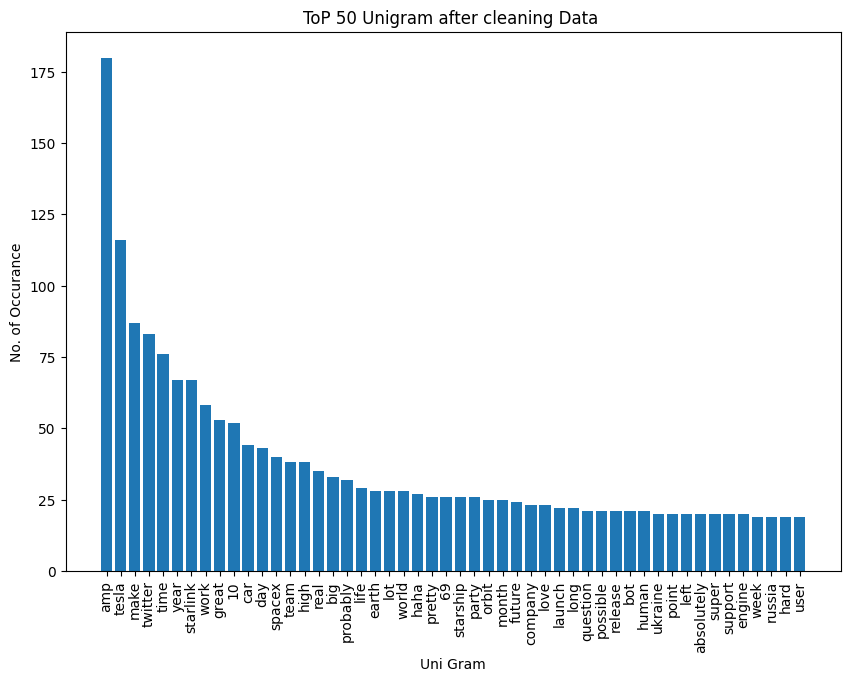

In [94]:
unigramDF= pd.DataFrame(unigram[0:50])
unigramDF.columns=["word","frequency"]
print("Top Unigram")
print(unigramDF.head(10))
fig = plt.figure(figsize =(10, 7))
plt.bar(unigramDF['word'], unigramDF["frequency"])
y_pos = range(len(unigramDF['word']))
plt.xticks(y_pos, unigramDF['word'], rotation=90)
plt.xlabel("Uni Gram")
plt.ylabel("No. of Occurance")
plt.title("ToP 50 Unigram after cleaning Data ")
plt.show()

Top Bigram
                       word  frequency
0         self driving beta          7
1  make life multiplanetary          6
2           driving beta 10          6
3                beta 10 69          5
4            low birth rate          4
5        spacex falcon team          4
6           burnt hair sell          3
7            tesla day 2022          3
8     starlinks reach orbit          3
9          tesla amp spacex          3


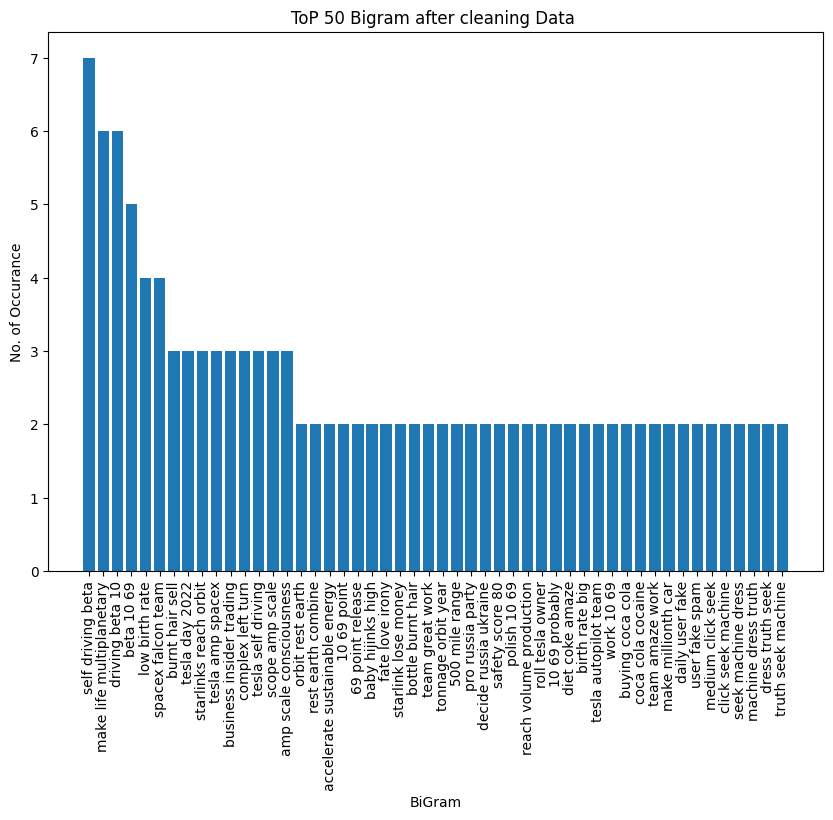

In [90]:
bigram=getNgrams(tweetdf['CleanedTweet'], ngramFrom=3, ngramTo=3)
bigramDF= pd.DataFrame(bigram[0:50])
bigramDF.columns=["word","frequency"]
print("Top Bigram")
print(bigramDF.head(10))
fig = plt.figure(figsize =(10, 7))
plt.bar(bigramDF['word'], bigramDF["frequency"])
y_pos = range(len(bigramDF['word']))
plt.xticks(y_pos, bigramDF['word'], rotation=90)
plt.xlabel("BiGram")
plt.ylabel("No. of Occurance")
plt.title("ToP 50 Bigram after cleaning Data ")
plt.show()


In [106]:
tweetdf['NLTKTBAnalysis']= tweetdf.apply(lambda row: nltktextBlobAnalysis(row['Tweet']), axis =1)
tweetdf['NLTKVADERAnalysisScore']= tweetdf.apply(lambda row: nltkvaderAnalysisScore(row['Tweet']), axis =1)
tweetdf['NLTKVADERAnalysis']= tweetdf.apply(lambda row: nltkvaderAnalysis(row['Tweet']), axis =1)
tweetdf['NLTKTBAnalysisScore']= tweetdf.apply(lambda row: nltktextBlobAnalysisScore(row['Tweet']), axis =1)

/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_92002/62963121.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='60Min', convention='start')).mean()


<AxesSubplot: title={'center': 'NLTK Text Blob Analysis'}, xlabel='created_at', ylabel='Sentiment Score'>

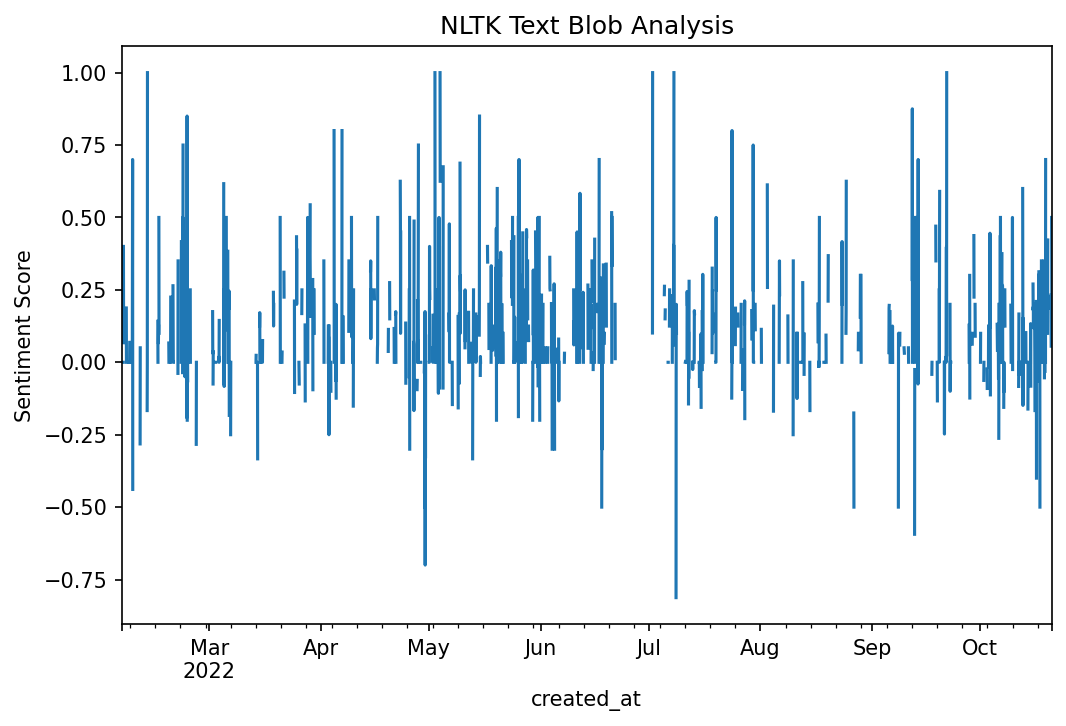

In [107]:
plt.figure(figsize=(8, 5), dpi=150)
plt.title("NLTK Text Blob Analysis")
plt.xlabel("Created Date")
plt.ylabel("Sentiment Score")
tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='60Min', convention='start')).mean()
tgp['NLTKTBAnalysisScore'].plot(label='Tesla')

/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_92002/3776436632.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='2400Min', convention='start')).mean()


<AxesSubplot: title={'center': 'NLTK Text Blob Analysis'}, xlabel='created_at', ylabel='Sentiment Score'>

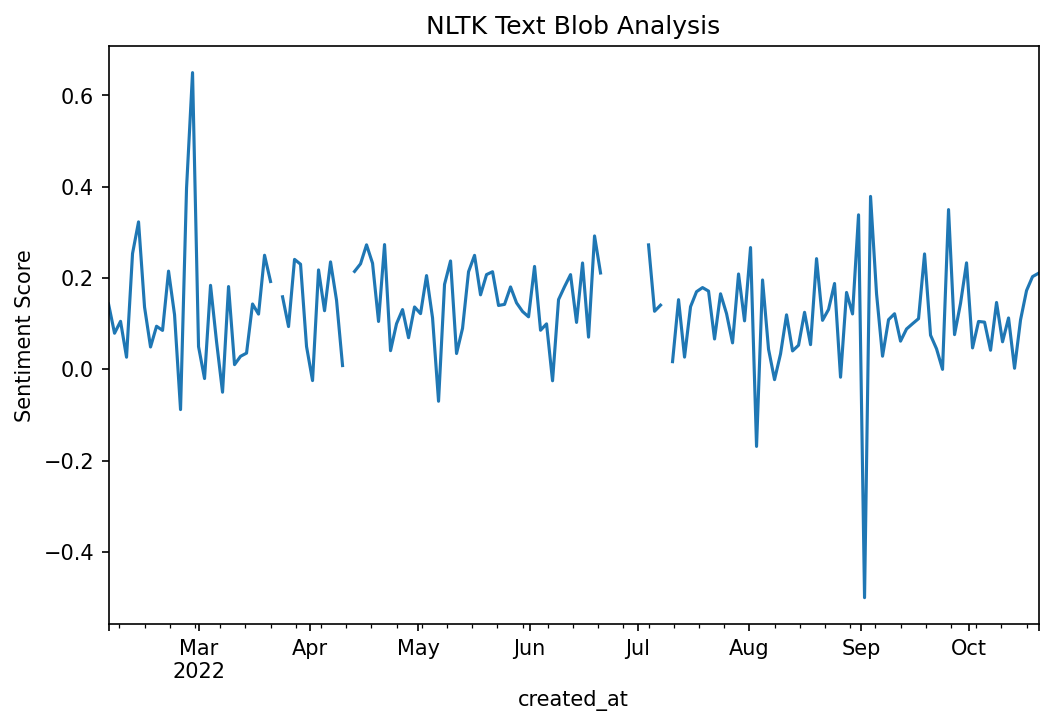

In [108]:
plt.figure(figsize=(8, 5), dpi=150)
plt.title("NLTK Text Blob Analysis")
plt.xlabel("Created Date")
plt.ylabel("Sentiment Score")
tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='2400Min', convention='start')).mean()
tgp['NLTKTBAnalysisScore'].plot(label='Tesla')

/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_92002/3366273579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='60Min', convention='start')).mean()


<AxesSubplot: title={'center': 'NLTK VADER Analysis'}, xlabel='created_at', ylabel='Sentiment Score'>

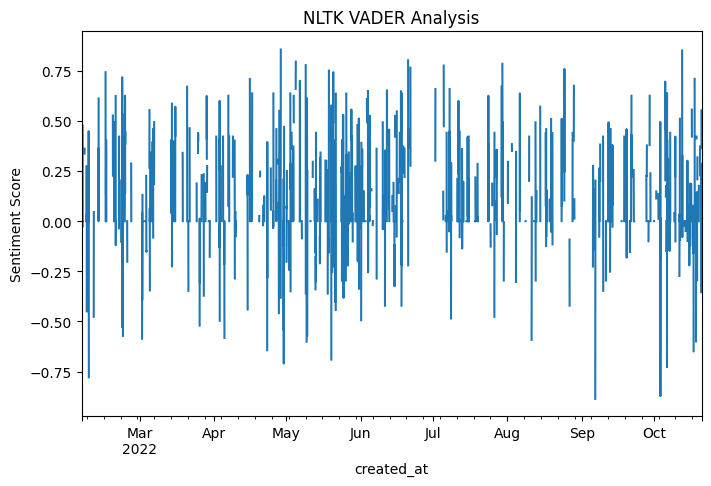

In [109]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("NLTK VADER Analysis")
plt.xlabel("Created Date")
plt.ylabel("Sentiment Score")
tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='60Min', convention='start')).mean()
tgp['NLTKVADERAnalysisScore'].plot(label='Tesla')

/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_92002/2214622366.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='24H', convention='start')).mean()


<AxesSubplot: title={'center': 'NLTK VADER Analysis'}, xlabel='created_at', ylabel='Sentiment Score'>

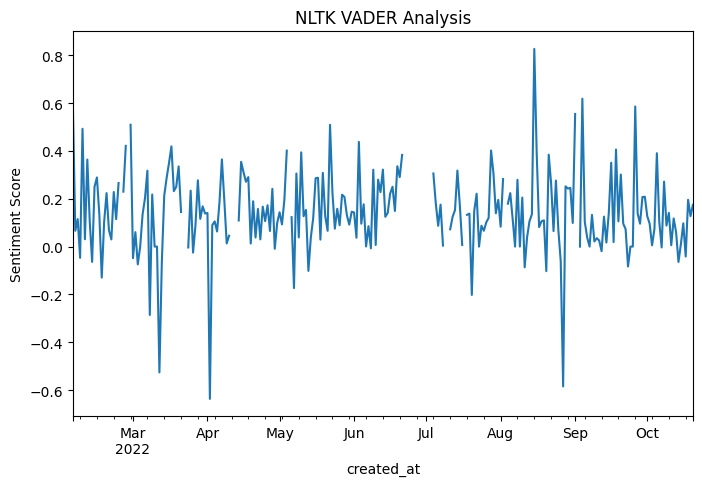

In [110]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("NLTK VADER Analysis")
plt.xlabel("Created Date")
plt.ylabel("Sentiment Score")
tgp =tweetdf.groupby(pd.Grouper(key='created_at', freq='24H', convention='start')).mean()
tgp['NLTKVADERAnalysisScore'].plot(label='Tesla')

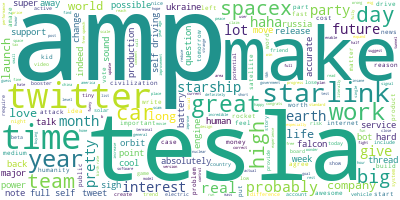

In [111]:
#Explorartory Analysis
convertTexttoWordCloud(tweetdf['CleanedTweet'])

In [117]:
# convertTexttoWordCloud(tweetdf['Tweet'])

In [113]:
#LDA Topic Modeling and Analysis 
allTweetstowords = tweetdf.CleanedTweet.values.tolist()
teslacorpora=list(sentenceToWords(allTweetstowords))

In [114]:
import gensim.corpora as corpora

teslacorporaDict = corpora.Dictionary(teslacorpora)
tweetsText = teslacorpora
# TDF
tweetCorpus = [teslacorporaDict.doc2bow(text) for text in tweetsText]

In [115]:
from pprint import pprint
num_topics = 3
ldaModel = gensim.models.LdaMulticore(corpus=tweetCorpus,
                                       id2word=teslacorporaDict,
                                       num_topics=num_topics)
pprint(ldaModel.print_topics())
# doc_lda = ldaModel[tweetCorpus]

[(0,
  '0.015*"tesla" + 0.009*"time" + 0.008*"great" + 0.008*"make" + 0.008*"amp" + '
  '0.007*"twitter" + 0.006*"car" + 0.005*"day" + 0.004*"interest" + '
  '0.004*"full"'),
 (1,
  '0.017*"amp" + 0.009*"twitter" + 0.008*"year" + 0.006*"tesla" + 0.005*"day" '
  '+ 0.005*"time" + 0.005*"give" + 0.004*"haha" + 0.004*"lot" + 0.004*"high"'),
 (2,
  '0.018*"amp" + 0.011*"starlink" + 0.010*"make" + 0.006*"tesla" + '
  '0.006*"team" + 0.006*"work" + 0.005*"orbit" + 0.004*"twitter" + '
  '0.004*"time" + 0.003*"year"')]


In [116]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath =str(num_topics)


LDAvis = pyLDAvis.gensim_models.prepare(ldaModel, tweetCorpus, teslacorporaDict)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis = pickle.load(f)

pyLDAvis.save_html(LDAvis, str(num_topics) +'.html')

LDAvis

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.072708 -0.000072       1        1  35.014651
1     -0.036420 -0.059050       2        1  33.127599
2     -0.036288  0.059121       3        1  31.857750, topic_info=         Term        Freq       Total Category  logprob  loglift
63   starlink   50.000000   50.000000  Default  30.0000  30.0000
35      orbit   19.000000   19.000000  Default  29.0000  29.0000
42      great   40.000000   40.000000  Default  28.0000  28.0000
13        amp  134.000000  134.000000  Default  27.0000  27.0000
26       team   29.000000   29.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
1      pretty    7.656300   19.977608   Topic3  -6.0013   0.1848
165      high    8.324702   29.017600   Topic3  -5.9176  -0.1048
304       big    7.952244   25.404463   Topic3  -5.9634  -0.0176
873       car    8.389950   33.863501   Topic3  -5.9098  -0.2514
34      earth    7.606111   21.599224   Topic3  -6.0079   0.1002

[244 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
145       1  0.191841  absolutely
145       2  0.127894  absolutely
145       3  0.703417  absolutely
227       1  0.237907    accurate
227       2  0.555115    accurate
...     ...       ...         ...
394       2  0.557987       world
394       3  0.278994       world
30        1  0.257336        year
30        2  0.514671        year
30        3  0.217746        year

[387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from im

In [43]:
top3NegativereviewNLTKVADER = getTopSentiment(tweetdf,'NLTKVADERAnalysisScore',True)
top3NegativereviewNLTKTB = getTopSentiment(tweetdf,'NLTKTBAnalysisScore',True)

In [44]:
top3PositivereviewNLTKVADER = getTopSentiment(tweetdf,'NLTKVADERAnalysisScore',False)
top3PositivereviewNLTKTB = getTopSentiment(tweetdf,'NLTKTBAnalysisScore',False)

In [45]:
#print Tweeet
def printTo3rows(df):
    ndf = df.head(2)
    for index, row in ndf.iterrows():
        print("Date:")
        print("-"*35)
        print(row['created_at'])
        print("-"*35)
        print("Tweet:")
        print("-"*35)
        print(row['Tweet'])
        print("\n")
        print("Cleaned Tweet:")
        print("-"*35)
        print(row['CleanedTweet'])
        print("-"*35)
        print("NLTK VADER Analysis Score    : " + str(row['NLTKVADERAnalysisScore']))
        print("NLTK VADER Sentiment         : " + str(row['NLTKVADERAnalysis']))
        print("NLTK TextBlob Analysis Score : " + str(row['NLTKTBAnalysisScore']))
        print("NLTK TextBlob Sentiment      : " + str(row['NLTKTBAnalysis']))
        print("-"*35)
        print("\n")

In [46]:
printTo3rows(top3NegativereviewNLTKTB)

Date:
-----------------------------------
2022-08-28 23:18:59+00:00
-----------------------------------
Tweet:
-----------------------------------
If you don't have a Hexagon.. you are fake and a bot in my book!! #NFTCommunity .... it will be like owning a #TESLA  and not paying for the autopilot feature, or having a lambo in the garage 24/7  365!!


Cleaned Tweet:
-----------------------------------
hexagon fake bot book pay autopilot feature lambo garage 24 7 365
-----------------------------------
NLTK VADER Analysis Score    : -0.4153
NLTK VADER Sentiment         : negative
NLTK TextBlob Analysis Score : -1.0
NLTK TextBlob Sentiment      : negative
-----------------------------------


Date:
-----------------------------------
2022-08-23 21:51:21+00:00
-----------------------------------
Tweet:
-----------------------------------
OUTRAGEOUS AND AUDACIOUS 

@DrKnowItAll16 

AUDACIOUS AI: Tesla's Autopilot Team is Doing The IMPOSSIBLE! https://t.co/LYXpYDf7Iq via @YouTube


Cleaned T

In [47]:
printTo3rows(top3PositivereviewNLTKTB)

Date:
-----------------------------------
2022-09-01 15:12:49+00:00
-----------------------------------
Tweet:
-----------------------------------
We need a “awesome job” button. If FSD AP does something not so well we report it. But when I’m blown away by how it handles curvy lanes, or traffic around me there’s no way give the FSD team kudos.  #tesla #autopilot #fsd #fsdbeta @elonmusk https://t.co/jobsUePxoN


Cleaned Tweet:
-----------------------------------
awesome job button full self driving report blown away handle curvy lane traffic give full self driving team kudos
-----------------------------------
NLTK VADER Analysis Score    : -0.0486
NLTK VADER Sentiment         : negative
NLTK TextBlob Analysis Score : 1.0
NLTK TextBlob Sentiment      : positive
-----------------------------------


Date:
-----------------------------------
2022-08-28 01:54:11+00:00
-----------------------------------
Tweet:
-----------------------------------
Awesome, and well explained for those that s